install libraries

In [ ]:
!pip install geopandas
!pip install geoplot
!pip install shapely

import modules

In [2]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('bmh')
from google.colab import drive
from shapely.geometry import Point, Polygon

import and read datasets

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df_ph = gpd.GeoDataFrame.from_file('/content/gdrive/My Drive/shp/gadm36_PHL_2.shp')
df_world_pop = gpd.read_file('/content/gdrive/My Drive/Final Requirements Datasets/World cities population.csv')
collision_points = df_world_pop.apply(
    lambda srs: Point(float(srs['lng']), float(srs['lat'])),
    axis='columns'
)
df_world_pop['geometry'] = collision_points

In [ ]:
df_ph

In [24]:
df_world_pop[df_world_pop['country'] == 'Philippines']

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,geometry
4,Manila,Manila,14.6,120.9833,Philippines,PH,PHL,Manila,primary,23088000,1608618140,POINT (120.98330 14.60000)
268,Quezon City,Quezon City,14.6333,121.0333,Philippines,PH,PHL,Quezon,admin,2936116,1608974097,POINT (121.03330 14.63330)
461,Davao,Davao,7.0667,125.6,Philippines,PH,PHL,Davao,admin,1632991,1608906877,POINT (125.60000 7.06670)
465,Caloocan City,Caloocan City,14.65,120.9667,Philippines,PH,PHL,Caloocan,admin,1583978,1608897690,POINT (120.96670 14.65000)
915,Cebu City,Cebu City,10.3,123.9,Philippines,PH,PHL,Cebu,admin,922611,1608136151,POINT (123.90000 10.30000)
...,...,...,...,...,...,...,...,...,...,...,...,...
38995,Villaviciosa,Villaviciosa,17.4379,120.6253,Philippines,PH,PHL,Abra,,5392,1608030318,POINT (120.62530 17.43790)
39036,Maslog,Maslog,12.1,125.1667,Philippines,PH,PHL,Eastern Samar,,5407,1608182078,POINT (125.16670 12.10000)
39178,Nagbukel,Nagbukel,17.45,120.55,Philippines,PH,PHL,Ilocos Sur,,5259,1608534703,POINT (120.55000 17.45000)
39945,Tineg,Tineg,17.7828,120.9439,Philippines,PH,PHL,Abra,,5097,1608313551,POINT (120.94390 17.78280)


set values needed for visualization

In [7]:
# get cities in the Ph
df_ph_cities = df_world_pop[df_world_pop['country'] == 'Philippines']

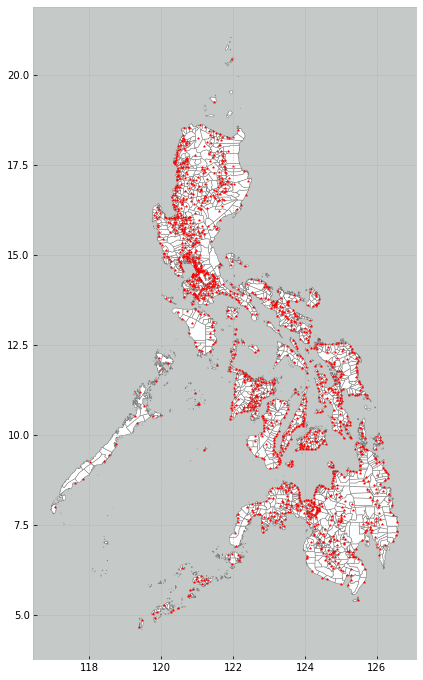

In [38]:
# graph dot map
ax = df_ph.plot(figsize=(12,12), color='white', edgecolor='gray')
df_ph_cities.plot(marker='*', color='red', markersize=5, ax=ax)
ax.set_facecolor('xkcd:silver')

In [54]:
# get population and geometry from the datasets
ph_pop = df_ph[['NAME_2', 'geometry']]
population =[]
for i in range(ph_pop.shape[0]):
  temp = df_ph_cities[df_ph_cities['city'] == ph_pop.NAME_2[i]]
  if temp.empty:
    population.append(0)
  else:
    population.append(temp.population.iloc[0])
ph_pop['population'] = pd.to_numeric(pd.Series(population))
ph_pop

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,NAME_2,geometry,population
0,Bangued,"POLYGON ((120.62710 17.49300, 120.62177 17.493...",48163.0
1,Boliney,"POLYGON ((120.99042 17.39802, 120.98631 17.387...",0.0
2,Bucay,"POLYGON ((120.70788 17.45395, 120.70621 17.455...",17115.0
3,Bucloc,"POLYGON ((120.78956 17.41699, 120.78922 17.445...",0.0
4,Daguioman,"POLYGON ((120.92917 17.41307, 120.92464 17.413...",0.0
...,...,...,...
1642,Roseller Lim,"MULTIPOLYGON (((122.54519 7.68240, 122.54472 7...",43646.0
1643,Siay,"MULTIPOLYGON (((122.81555 7.72806, 122.81500 7...",41572.0
1644,Talusan,"MULTIPOLYGON (((122.91917 7.34111, 122.91861 7...",29969.0
1645,Titay,"POLYGON ((122.59055 7.82854, 122.58292 7.82560...",49673.0


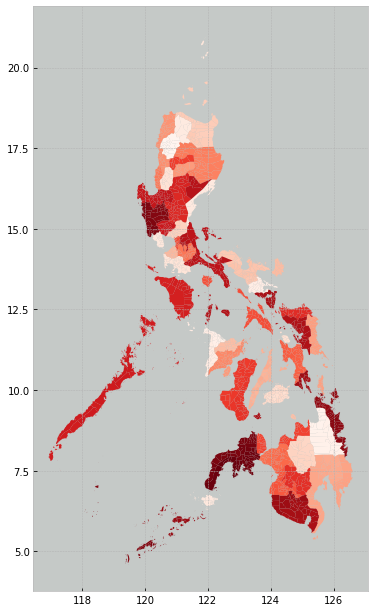

In [56]:
# create choropleth
fig, ax = plt.subplots(figsize=(6, 12))
ph_pop.plot(ax=ax, cmap='Reds')
# ax.axis('off');
ax.set_facecolor('xkcd:silver')